In [1]:
!pip3 install dalle2-pytorch

     ---------------------------------------- 1.4/1.4 MB 11.2 MB/s eta 0:00:00
     ------------------------------------- 512.8/512.8 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 12.4 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 10.9 MB/s eta 0:00:00
     ------------------------------------- 409.8/409.8 kB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 86.7/86.7 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 140.6/140.6 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 46.9/46.9 kB ? eta 0:00:00
     ---------------------------------------- 53.8/53.8 kB 2.7 MB/s eta 0:00:00
     --------------------------------------- 16.1/16.1 MB 11.1 MB/s eta 0:00:00
  Created wheel for youtokentome: filename=youtokentome-1.0.6-cp39-cp39-win_amd64.whl size=143300 sha256=b11096d785

In [2]:
!pip3 install x-clip

In [3]:
!pip3 install vit_pytorch>=0.25.6

In [4]:
import torch
from dalle2_pytorch import DALLE2, DiffusionPriorNetwork, DiffusionPrior, Unet, Decoder
from vit_pytorch import ViT
from vit_pytorch.extractor import Extractor
from x_clip import CLIP, TextTransformer
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
clip = CLIP(
    dim_text = 512,
    dim_image = 512,
    dim_latent = 512,
    num_text_tokens = 49408,
    text_enc_depth = 1,
    text_seq_len = 256,
    text_heads = 8,
    visual_enc_depth = 1,
    visual_image_size = 256,
    visual_patch_size = 32,
    visual_heads = 8,
    use_all_token_embeds = True,            # whether to use fine-grained contrastive learning (FILIP)
    decoupled_contrastive_learning = True,  # use decoupled contrastive learning (DCL) objective function, removing positive pairs from the denominator of the InfoNCE loss (CLOOB + DCL)
    extra_latent_projection = True,         # whether to use separate projections for text-to-image vs image-to-text comparisons (CLOOB)
    use_visual_ssl = True,                  # whether to do self supervised learning on images
    visual_ssl_type = 'simclr',             # can be either 'simclr' or 'simsiam', depending on using DeCLIP or SLIP
    use_mlm = False,                        # use masked language learning (MLM) on text (DeCLIP)
    text_ssl_loss_weight = 0.05,            # weight for text MLM loss
    image_ssl_loss_weight = 0.05            # weight for image self-supervised learning loss
).cuda()

In [4]:
# mock data

text = torch.randint(0, 49408, (4, 256)).cuda()
images = torch.randn(4, 3, 256, 256).cuda()

In [5]:
loss = clip(
    text,
    images,
    return_loss = True              # needs to be set to True to return contrastive loss
)

In [6]:
loss.backward()

# do the above with as many texts and images as possible in a loop

In [29]:
# trained clip from step 1

clip = CLIP(
    dim_text = 700,
    dim_image = 700,
    dim_latent = 700,
    num_text_tokens = 49408,
    text_enc_depth = 6,
    text_seq_len = 350,
    text_heads = 8,
    visual_enc_depth = 6,
    visual_image_size = 350,
    visual_patch_size = 32,
    visual_heads = 8
).cuda()

AssertionError: Image dimensions must be divisible by the patch size.

In [3]:
# unet for the decoder

unet = Unet(
    dim = 128,
    image_embed_dim = 512,
    cond_dim = 128,
    channels = 3,
    dim_mults=(1, 2, 4, 8)
).cuda()

In [4]:
# decoder, which contains the unet and clip

decoder = Decoder(
    unet = unet,
    clip = clip,
    timesteps = 100,
    image_cond_drop_prob = 0.1,
    text_cond_drop_prob = 0.5
).cuda()

In [5]:
# mock images (get a lot of this)

images = torch.randn(4, 3, 256, 256).cuda()

# feed images into decoder

loss = decoder(images)
loss.backward()

# do the above for many many many many steps
# then it will learn to generate images based on the CLIP image embeddings

RuntimeError: CUDA out of memory. Tried to allocate 128.00 MiB (GPU 0; 8.00 GiB total capacity; 6.11 GiB already allocated; 0 bytes free; 6.20 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [82]:
dataset = pd.read_csv('image_data/cc12m.tsv', delimiter = '\t')
dataset

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [7]:
dataset.columns = ['link', 'word']

In [83]:
clip = CLIP(
    dim_text = 512,
    dim_image = 512,
    dim_latent = 512,
    num_text_tokens = 49408,
    text_enc_depth = 6,
    text_seq_len = 256,
    text_heads = 8,
    visual_enc_depth = 6,
    visual_image_size = 256,
    visual_patch_size = 32,
    visual_heads = 8
)

In [95]:
text = torch.randint(0, 49408, (1, 256))
text

tensor([[16522, 33968, 34050,  4941,  3906,  7628, 44550,  8620, 18497, 21593,
         38529, 43928, 43502,   425,  3349, 22098, 46552, 42670, 34626, 29797,
         41531, 46515, 16253,  7936,  6651, 41004, 34342, 43300, 19585, 22350,
         25137, 30814, 22075, 32434, 22661, 22550, 48991, 35646, 22193, 21045,
          6075, 17781,  6202, 19710, 48959, 36748, 32141, 16761,  7362, 26188,
         24221,  9993, 10442, 35482,  3448, 34076, 24365, 47999, 49299, 25646,
         24800, 17524, 21203, 35397, 13882, 34077, 43832, 32006,  7254,  7185,
         37095, 15271, 48741, 17816, 43392,  7158, 14646, 36404, 15516, 16106,
         29667, 37798, 28287, 37832,  3642, 41844, 21975,  5785, 43431, 38854,
         29611,  1889, 35989,  1909, 28053, 24104, 28795, 30116, 27469, 30859,
          6749, 19830, 20617, 46920,  5156, 15532, 25823, 17725, 15624, 18995,
          9955, 15474, 35649, 14293, 38419, 16474, 47011, 44047, 41737, 28586,
         11544, 14855,  7940, 28378,  8760, 49195, 1

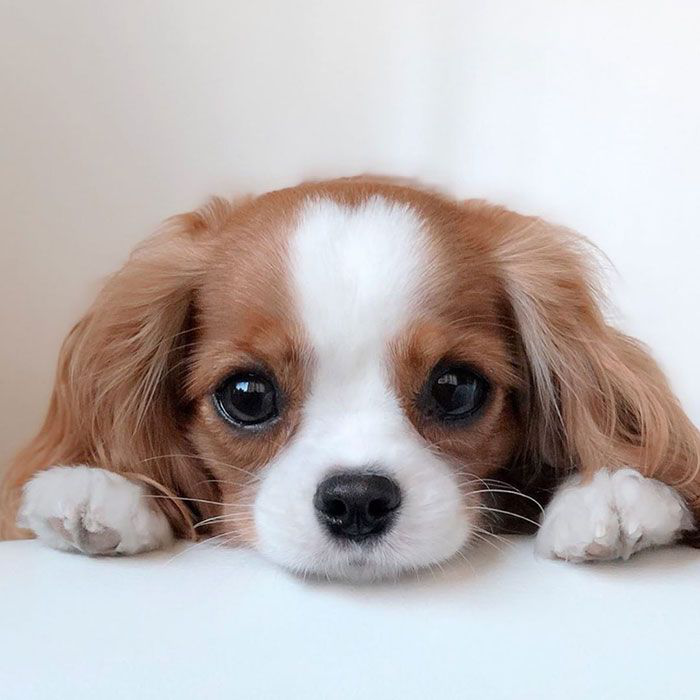

In [96]:
puppy = Image.open('image_data/puppy.jpg')
puppy

In [97]:
puppy = puppy.resize((256, 256))

In [98]:
tf = transforms.ToTensor()
image = tf(puppy)
print(image.size())

torch.Size([3, 256, 256])


In [99]:
fr = torch.FloatTensor(image)

In [100]:
image = fr.reshape(1, 3, 256, 256)
image

tensor([[[[0.7961, 0.7961, 0.8000,  ..., 0.9647, 0.9647, 0.9647],
          [0.7922, 0.7922, 0.7961,  ..., 0.9647, 0.9647, 0.9647],
          [0.7882, 0.7922, 0.7922,  ..., 0.9647, 0.9647, 0.9647],
          ...,
          [0.8706, 0.8706, 0.8706,  ..., 0.8784, 0.8784, 0.8784],
          [0.8627, 0.8627, 0.8588,  ..., 0.8745, 0.8745, 0.8745],
          [0.8627, 0.8627, 0.8588,  ..., 0.8706, 0.8706, 0.8784]],

         [[0.7765, 0.7765, 0.7804,  ..., 0.9608, 0.9608, 0.9608],
          [0.7725, 0.7725, 0.7765,  ..., 0.9608, 0.9608, 0.9608],
          [0.7686, 0.7725, 0.7725,  ..., 0.9608, 0.9608, 0.9608],
          ...,
          [0.9255, 0.9255, 0.9255,  ..., 0.9451, 0.9451, 0.9451],
          [0.9216, 0.9216, 0.9216,  ..., 0.9412, 0.9412, 0.9412],
          [0.9255, 0.9255, 0.9216,  ..., 0.9373, 0.9373, 0.9451]],

         [[0.7608, 0.7608, 0.7647,  ..., 0.9843, 0.9843, 0.9843],
          [0.7569, 0.7569, 0.7608,  ..., 0.9843, 0.9843, 0.9843],
          [0.7529, 0.7569, 0.7569,  ..., 0

In [90]:
# train

loss = clip(
    text,
    image,
    freeze_image_encoder = False,   # whether to freeze image encoder if using a pretrained image net, proposed by LiT paper
    return_loss = True              # needs to be set to True to return contrastive loss
)

loss.backward()

In [91]:
prior_network = DiffusionPriorNetwork(
    dim = 512,
    depth = 6,
    dim_head = 64,
    heads = 8
)

diffusion_prior = DiffusionPrior(
    net = prior_network,
    clip = clip,
    timesteps = 100,
    cond_drop_prob = 0.2
)

loss = diffusion_prior(text, image)
loss.backward()

# do above for many steps ...

# decoder (with unet)

unet1 = Unet(
    dim = 128,
    image_embed_dim = 512,
    cond_dim = 128,
    channels = 3,
    dim_mults=(1, 2, 4, 8)
)

unet2 = Unet(
    dim = 16,
    image_embed_dim = 512,
    cond_dim = 128,
    channels = 3,
    dim_mults = (1, 2, 4, 8, 16)
)

decoder = Decoder(
    unet = (unet1, unet2),
    image_sizes = (128, 256),
    clip = clip,
    timesteps = 100,
    image_cond_drop_prob = 0.1,
    text_cond_drop_prob = 0.5,
    condition_on_text_encodings = False  # set this to True if you wish to condition on text during training and sampling
)

for unet_number in (1, 2):
    loss = decoder(image, unet_number = unet_number) # this can optionally be decoder(images, text) if you wish to condition on the text encodings as well, though it was hinted in the paper it didn't do much
    loss.backward()

# do above for many steps

dalle2 = DALLE2(
    prior = diffusion_prior,
    decoder = decoder
)

image = dalle2(
    ['cute puppy chasing after a squirrel'],
    cond_scale = 2. # classifier free guidance strength (> 1 would strengthen the condition)
)

# save your image (in this example, of size 256x256)

sampling loop time step: 100%|███████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.12it/s]
0it [00:00, ?it/s]
sampling loop time step:  64%|███████████████████████████████████▊                    | 64/100 [01:58<01:06,  1.85s/it]


sampling loop time step: 100%|███████████████████████████████████████████████████████| 100/100 [03:04<00:00,  1.85s/it]
1it [03:04, 184.60s/it]
sampling loop time step:  29%|████████████████▏                                       | 29/100 [00:23<00:57,  1.24it/s]


sampling loop time step:  95%|█████████████████████████████████████████████████████▏  | 95/100 [01:17<00:04,  1.24it/s]


sampling loop time step: 100%|███████████████████████████████████████████████████████| 100/100 [01:21<00:00,  1.22it/s]
2it [04:26, 133.22s/it]


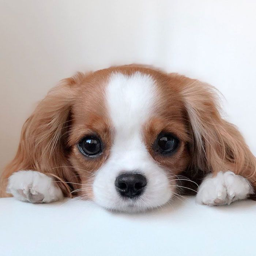

In [101]:
tt = transforms.ToPILImage()
img = tt(image[0])
img